In [ ]:
!pip install ultralytics

In [ ]:
from ultralytics import YOLO

In [ ]:
model = YOLO("yolov8m.pt")

100%|██████████| 49.7M/49.7M [00:01<00:00, 51.3MB/s]


# **Predict model**

In [ ]:
results = model.predict("/content/Firefly A small different fish..jpg")


image 1/1 /content/Firefly A small different fish..jpg: 480x640 1 bird, 1 kite, 1 bowl, 1 cake, 1244.3ms
Speed: 16.3ms preprocess, 1244.3ms inference, 25.2ms postprocess per image at shape (1, 3, 480, 640)


In [ ]:
result = results[0]
print(len(result.boxes))

4


In [ ]:
for box in result.boxes:
    label = result.names[box.cls[0].item()]
    cords = [round(x) for x in box.xyxy[0].tolist()]  # Fix typo here
# Check the correct attribute name for probability scores
    if hasattr(box, 'scores'):
        prob = box.scores[0].item()
    elif hasattr(box, 'confidence'):
        prob = box.confidence[0].item()
    else:
        prob = None  # Handle the case where the attribute is not found

    print("object type:", label)
    print("coordinates:", cords)
    print("probability:", prob)  # Fix variable name here
    print("---")

object type: bowl
coordinates: [63, 122, 1173, 954]
probability: None
---
object type: bird
coordinates: [795, 439, 1081, 699]
probability: None
---
object type: cake
coordinates: [94, 122, 1180, 954]
probability: None
---
object type: kite
coordinates: [198, 271, 488, 532]
probability: None
---


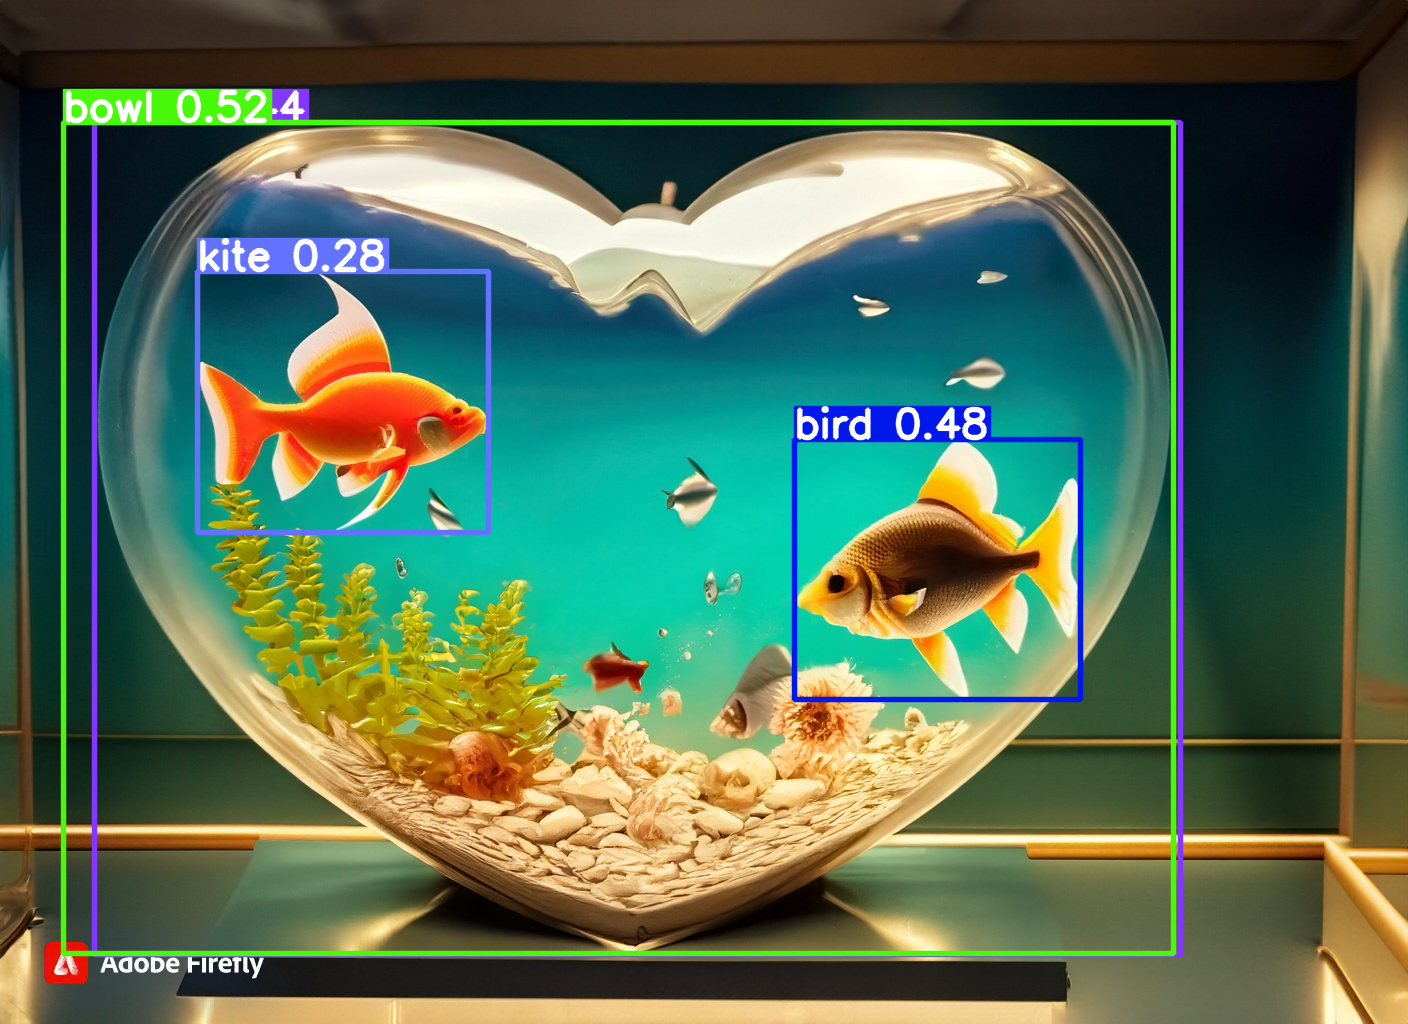

<Figure size 800x500 with 0 Axes>

In [ ]:
from ultralytics.utils.metrics import plt
import matplotlib.pyplot as plt
from PIL import Image

plt.figure(figsize=(8,5))
Image.fromarray(result.plot()[:,:,::-1])